In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy import optimize
from wavefunction import *
from wavefunction.wavefunction1d import *
from wavefunction.utils import *
from AC_qubit_func import spectrum_vs_ng
from AC_qubit_func import spectrum_vs_phi0

Populating the interactive namespace from numpy and matplotlib


In [2]:
params = {'EJ':6.25,'EC':6.7,'EL':0.4,'ECL':5,'Delta_EJ':0.}
params = {'EJ':6,'EC':1.5*20,'EL':0.008*20,'ECL':0.32*20,'Delta_EJ':0}
# params['EL'] = 100

In [3]:
args = {'Phi_min':-8*pi,'Phi_max':8*pi,'Qdim':7,'gridsize':50}

Q_dim = args['Qdim']
Q_list = np.arange(Q_dim)-3

# $E_{01}\,vs.\,n_g$

In [4]:
Phi0=0
ng_list = np.linspace(-1,1,20)
energy = spectrum_vs_ng(ng_list,Q_list,Phi0,params,args,asymEJ=True)

Text(0.5,1,'$E_{01}$ vs. $n_g$, $\\Phi_{ext}/\\Phi_0$=0.0')

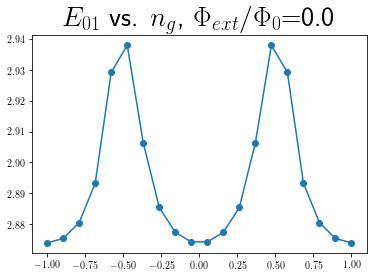

In [5]:
plt.rc('text', usetex=True)
plt.plot(energy[:,0],energy[:,2]-energy[:,1],'o-')
plt.title(r'$E_{01}$ vs. $n_g$, $\Phi_{ext}/\Phi_0$=%.1f'%(Phi0/pi),fontsize=28)

In [6]:
Phi0=pi
energy = spectrum_vs_ng(ng_list,Q_list,Phi0,params,args,asymEJ=True)

Text(0.5,1,'$E_{01}$ vs. $n_g$, $\\Phi_{ext}/\\Phi_0$=1.0')

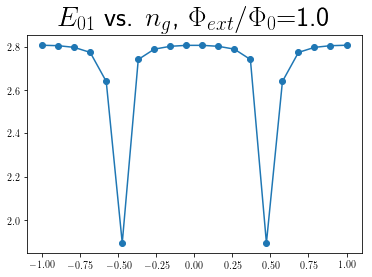

In [7]:
plt.rc('text', usetex=True)
plt.plot(energy[:,0],energy[:,2]-energy[:,1],'o-')
plt.title(r'$E_{01}$ vs. $n_g$, $\Phi_{ext}/\Phi_0$=%.1f'%(Phi0/pi),fontsize=28)

# $E\,vs.\,\Phi_{ext}$

In [8]:
ng_list = [0,0.5]
phi0_list = linspace(-2*pi,pi*2,60)

In [9]:
max_E_level = 5
energy = spectrum_vs_phi0(phi0_list,Q_list,ng_list,params,
                          args,max_E_level=max_E_level)

d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


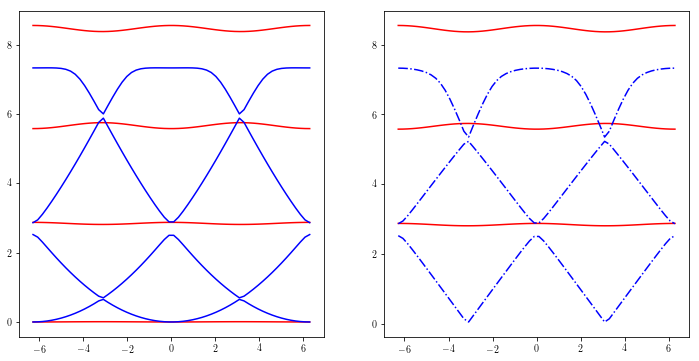

In [10]:
plt.subplots(1,2,figsize=(12,6))
max_E_level = 4
colors=['r','b']
linestyle=['-','-.']
for i in [0,1]:#np.arange(Q_list.size):
    plt.subplot(1,2,1)
    for j in np.arange(1,max_E_level+1):
        plt.plot(energy[i*phi0_list.size:(i+1)*phi0_list.size,0],\
                 energy[i*phi0_list.size:(i+1)*phi0_list.size,j]\
                 -np.min(energy[i*phi0_list.size:(i+1)*phi0_list.size,1]),\
                 c=colors[i])
#     plt.grid(axis='x')
    plt.subplot(1,2,2)
    for j in np.arange(2,max_E_level+1):
        plt.plot(energy[i*phi0_list.size:(i+1)*phi0_list.size,0],\
                 energy[i*phi0_list.size:(i+1)*phi0_list.size,j]\
                 -energy[i*phi0_list.size:(i+1)*phi0_list.size,1],\
                 c=colors[i],linestyle=linestyle[i],label='%.1f'%ng_list[i])
#     plt.legend()
#     plt.ylim([0,9])
# plt.xticks(pi*linspace(-2,2,5))

In [11]:
E_J =params['EJ']
E_C = params['EC']
E_L = params['EL']
E_CL = params['ECL']
Delta_E_J =params['Delta_EJ']

wp = (np.sqrt(2*E_J*E_CL))
g = 4*np.sqrt(2*E_J/E_CL)
# E_L=0.8 * np.sqrt(g) * np.exp(-g) * wp/(2*np.pi**2)/10
print('wp %.2f GHz' % wp)
print('E_dps %.5f GHz' % (0.8 * np.sqrt(g) * np.exp(-g) * wp))
print('EL %f GHz' % E_L)

wp 8.76 GHz
E_dps 0.06860 GHz
EL 0.160000 GHz
